In [1]:
import numpy as np
def reorder_landmark(landmark):
    landmark_add = np.zeros((13, 2))
    for idx, idx_l in enumerate(
        [77, 75, 76, 68, 69, 70, 71, 80, 72, 73, 79, 74, 78]):
        landmark_add[idx] = landmark[idx_l]
    landmark[68:] = landmark_add
    return landmark

def crop_face(
    img,
    landmark=None,
    bbox=None,
    margin=False,
    crop_by_bbox=True,
    abs_coord=False,
    only_img=False,
    phase="train",
):


    # crop face------------------------------------------
    H, W = len(img), len(img[0])

    assert landmark is not None or bbox is not None

    H, W = len(img), len(img[0])

    if crop_by_bbox:
        x0, y0 = bbox[0]
        x1, y1 = bbox[1]
        w = x1 - x0
        h = y1 - y0
        w0_margin = w / 4  # 0#np.random.rand()*(w/8)
        w1_margin = w / 4
        h0_margin = h / 4  # 0#np.random.rand()*(h/5)
        h1_margin = h / 4
    else:
        x0, y0 = landmark[:68, 0].min(), landmark[:68, 1].min()
        x1, y1 = landmark[:68, 0].max(), landmark[:68, 1].max()
        w = x1 - x0
        h = y1 - y0
        w0_margin = w / 8  # 0#np.random.rand()*(w/8)
        w1_margin = w / 8
        h0_margin = h / 2  # 0#np.random.rand()*(h/5)
        h1_margin = h / 5

    if margin:
        w0_margin *= 4
        w1_margin *= 4
        h0_margin *= 2
        h1_margin *= 2
    elif phase == "train":
        w0_margin *= np.random.rand() * 0.6 + 0.2  # np.random.rand()
        w1_margin *= np.random.rand() * 0.6 + 0.2  # np.random.rand()
        h0_margin *= np.random.rand() * 0.6 + 0.2  # np.random.rand()
        h1_margin *= np.random.rand() * 0.6 + 0.2  # np.random.rand()
    elif phase == "temporal":
        w0_margin *= 2
        w1_margin *= 2
        h0_margin *= 1
        h1_margin *= 1
    else:
        w0_margin *= 0.5
        w1_margin *= 0.5
        h0_margin *= 0.5
        h1_margin *= 0.5

    y0_new = max(0, int(y0 - h0_margin))
    y1_new = min(H, int(y1 + h1_margin) + 1)
    x0_new = max(0, int(x0 - w0_margin))
    x1_new = min(W, int(x1 + w1_margin) + 1)

    img_cropped = img[y0_new:y1_new, x0_new:x1_new]
    if landmark is not None:
        landmark_cropped = np.zeros_like(landmark)
        for i, (p, q) in enumerate(landmark):
            landmark_cropped[i] = [p - x0_new, q - y0_new]
    else:
        landmark_cropped = None
    if bbox is not None:
        bbox_cropped = np.zeros_like(bbox)
        for i, (p, q) in enumerate(bbox):
            bbox_cropped[i] = [p - x0_new, q - y0_new]
    else:
        bbox_cropped = None

    if only_img:
        return img_cropped
    if abs_coord:
        return (
            img_cropped,
            landmark_cropped,
            bbox_cropped,
            (y0 - y0_new, x0 - x0_new, y1_new - y1, x1_new - x1),
            y0_new,
            y1_new,
            x0_new,
            x1_new,
        )
    else:
        return (
            img_cropped,
            landmark_cropped,
            bbox_cropped,
            (y0 - y0_new, x0 - x0_new, y1_new - y1, x1_new - x1),
        )

def crop_face_temporal(img , landmark):
    x0 = np.min(landmark[2:, 0])
    y0 = np.min(landmark[2:, 1])
    x1 = np.max(landmark[2:, 0])
    y1 = np.max(landmark[2:, 1])

    margin = 0.7
    x0 = int(x0 - (x1 - x0) * margin)
    y0 = int(y0 - (y1 - y0) * margin)
    x1 = int(x1 + (x1 - x0) * margin)
    y1 = int(y1 + (y1 - y0) * margin)

    return img[y0:y1, x0:x1]


[[107.15  72.22]
 [214.13 216.2 ]
 [133.71 128.76]
 [182.16 126.79]
 [156.61 154.4 ]
 [140.6  182.32]
 [178.78 180.22]]
[[108 134]
 [109 147]
 [111 161]
 [113 174]
 [118 187]
 [125 199]
 [135 208]
 [146 215]
 [160 217]
 [174 215]
 [187 208]
 [199 198]
 [207 187]
 [212 173]
 [214 159]
 [215 144]
 [215 130]
 [116 121]
 [121 114]
 [130 111]
 [140 112]
 [149 115]
 [163 114]
 [173 110]
 [184 108]
 [194 111]
 [201 118]
 [157 125]
 [156 135]
 [156 144]
 [156 154]
 [147 161]
 [152 163]
 [157 165]
 [163 163]
 [169 160]
 [126 130]
 [131 126]
 [138 126]
 [144 129]
 [138 131]
 [131 131]
 [171 128]
 [178 124]
 [184 124]
 [190 127]
 [185 129]
 [178 129]
 [139 182]
 [146 177]
 [153 174]
 [158 176]
 [164 174]
 [172 176]
 [180 180]
 [172 186]
 [165 188]
 [159 189]
 [153 189]
 [146 187]
 [142 182]
 [153 179]
 [158 180]
 [164 179]
 [176 180]
 [164 182]
 [158 182]
 [153 182]
 [109 127]
 [112 101]
 [116  89]
 [119  83]
 [128  79]
 [142  81]
 [159  80]
 [178  80]
 [185  77]
 [197  81]
 [202  89]
 [210 105]


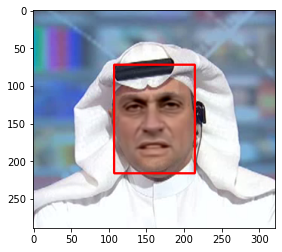

spatial branch before augment
crop by bbox & with margin


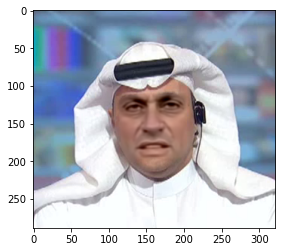

crop by landmark & with margin


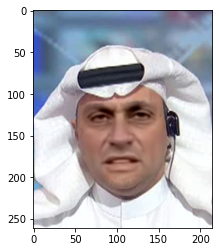

spatial branch after augment
crop by bbox & without margin


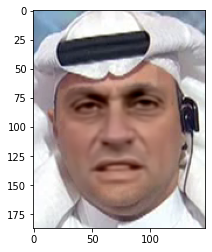

spatial branch after augment
crop by ld & without margin


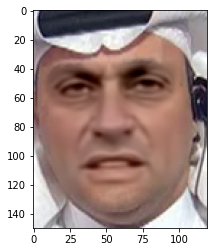

spatial branch inference
crop by bbox & without margin


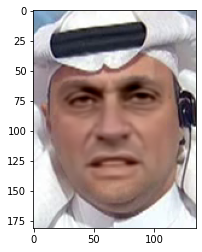

Temporal branch rawframe2


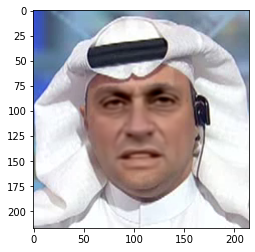

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches


image_p = "dataset/FaceForensics++/manipulated_sequences/Deepfakes/raw/rawframes/000_003/001.png"
bbox_p =  "dataset/FaceForensics++/manipulated_sequences/Deepfakes/raw/retina/000_003/001.npy"
landmark_p = "dataset/FaceForensics++/manipulated_sequences/Deepfakes/raw/landmarks/000_003/001.npy"

bbox = np.load(bbox_p)
landmark = np.load(landmark_p)
landmark = reorder_landmark(landmark)


image = cv2.imread(image_p)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_copy = image.copy()
cv2.rectangle(image_copy, (int(bbox[0][0]),int(bbox[0][1])),  (int(bbox[1][0]),int(bbox[1][1])),  (255, 0, 0), 2)
plt.imshow(image_copy)
plt.show()

####################################################
print("spatial branch before augment")
print("crop by bbox & with margin")
image_copy = image.copy()
img, _, _, __, y0_new, y1_new, x0_new, x1_new = crop_face(
                    image_copy,
                    landmark,
                    bbox,
                    margin=True,
                    crop_by_bbox=True,
                    abs_coord=True,
                )
plt.imshow(img)
plt.show()
###################################################
print("crop by landmark & with margin")
image_copy = image.copy()
img, _, _, __, y0_new, y1_new, x0_new, x1_new = crop_face(
                    image_copy,
                    landmark,
                    bbox,
                    margin=True,
                    crop_by_bbox=False,
                    abs_coord=True,
                )

plt.imshow(img)
plt.show()

###################################################
print("spatial branch after augment")
print("crop by bbox & without margin")
image_copy = image.copy()
img, _, _, __, y0_new, y1_new, x0_new, x1_new = crop_face(
                    image_copy,
                    landmark,
                    bbox,
                    margin=False,
                    crop_by_bbox=True,
                    abs_coord=True,
                )

plt.imshow(img)
plt.show()
###################################################
print("spatial branch after augment")
print("crop by ld & without margin")
image_copy = image.copy()
img, _, _, __, y0_new, y1_new, x0_new, x1_new = crop_face(
                    image_copy,
                    landmark,
                    bbox,
                    margin=False,
                    crop_by_bbox=False,
                    abs_coord=True,
                )

plt.imshow(img)
plt.show()
###################################################
print("spatial branch inference")
print("crop by bbox & without margin")
image_copy = image.copy()
img, _, _, __, y0_new, y1_new, x0_new, x1_new = crop_face(
                    image_copy,
                    landmark,
                    bbox,
                    margin=False,
                    crop_by_bbox=True,
                    abs_coord=True,
                    phase = "test"
                )

plt.imshow(img)
plt.show()
###################################################
print("Temporal branch rawframe2")

image_copy = image.copy()
img, _, _, __, y0_new, y1_new, x0_new, x1_new = crop_face(
                    image_copy,
                    landmark,
                    bbox,
                    margin=False,
                    crop_by_bbox=True,
                    abs_coord=True,
                    phase = "temporal"
                )

plt.imshow(img)
plt.show()

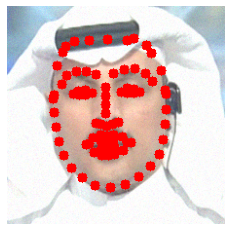

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches


image_p = "/home/jovyan/dataset/FaceForensics++/original_sequences/youtube/raw/rawframes2/000/040/img_00001.png"
# bbox_p =  "dataset/FaceForensics++/manipulated_sequences/Deepfakes/raw/rawframes2_retina/000/001.npy"
landmark_p = "/home/jovyan/dataset/FaceForensics++/original_sequences/youtube/raw/rawframes2_landmarks/000/040/img_00001.npy"
landmark = np.load(landmark_p)
landmark = reorder_landmark(landmark)

image = cv2.imread(image_p)

for point in landmark:
    cv2.circle(image, point, radius=5, color=(0, 0, 255), thickness=-1)  # 紅色圓點

# 顯示圖片
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()